# Plotting High Performance Areas

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Plots

From the .csv files generated by the "Sampling C4" and "Sampling C3" notebooks, the code below shows how all the information was put together and organized into a visualizable object.  Of the 9 starting points only 5 were used to compute the High Performance Areas that are here displayed. This is due to the fact that some of this starting points resulted in equal sum of fluxes/optimal biomass combinations, and therefore generated the same high performance areas. This was corrected by only displaying the HPA of unique starting points

### High Performance areas of the C3 model

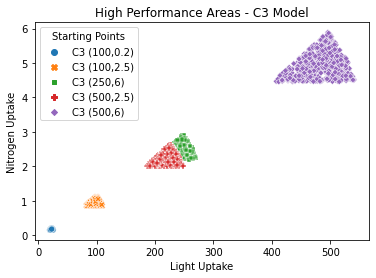

In [2]:
df_1_c3 = pd.read_csv("Sample_(100, 0.2)_c3.csv", usecols = ["Light", "N", "Biomass", "SoF"])
df_2_c3 = pd.read_csv("Sample_(100, 2.5)_c3.csv", usecols = ["Light", "N", "Biomass", "SoF"])
df_4_c3 = pd.read_csv("Sample_(250, 6)_c3.csv", usecols = ["Light", "N", "Biomass", "SoF"])
df_5_c3 = pd.read_csv("Sample_(500, 2.5)_c3.csv", usecols = ["Light", "N", "Biomass", "SoF"])
df_6_c3 = pd.read_csv("Sample_(500, 6)_c3.csv", usecols = ["Light", "N", "Biomass", "SoF"])
c3_concat = pd.concat([df_1_c3.assign(conditions ='C3 (100,0.2)'), df_2_c3.assign(conditions ='C3 (100,2.5)'), df_4_c3.assign(conditions ='C3 (250,6)') ,df_5_c3.assign(conditions ='C3 (500,2.5)') ,df_6_c3.assign(conditions ='C3 (500,6)')])

sns.scatterplot(x='Light', y='N', data=c3_concat, hue="conditions", style='conditions')
plt.title("High Performance Areas - C3 Model")
plt.xlabel('Light Uptake')
plt.ylabel('Nitrogen Uptake')
plt.legend(title = "Starting Points")
#plt.savefig('HPA_C3_Conditions.jpeg', format='jpeg', bbox_inches = 'tight')
plt.show()

### High Performance areas of the C3 model

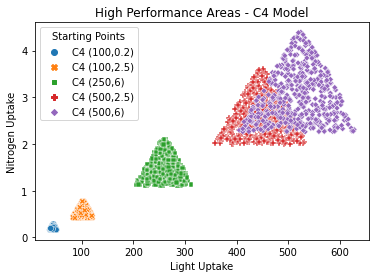

In [3]:
"""Plot for the High Performance areas of the C4 model"""

df_1_c4 =  pd.read_csv("Sample_(100, 0.2)_c4.csv", usecols= ["Light", "N", "Biomass", "SoF"])
df_2_c4 = pd.read_csv("Sample_(100, 2.5)_c4.csv", usecols= ["Light", "N", "Biomass", "SoF"])
df_4_c4 = pd.read_csv("Sample_(250, 6)_c4.csv", usecols= ["Light", "N", "Biomass", "SoF"])
df_5_c4 = pd.read_csv("Sample_(500, 2.5)_c4.csv", usecols= ["Light", "N", "Biomass", "SoF"])
df_6_c4 = pd.read_csv("Sample_(500, 6)_c4.csv", usecols= ["Light", "N", "Biomass", "SoF"])
c4_concat = pd.concat([df_1_c4.assign(conditions ='C4 (100,0.2)'), df_2_c4.assign(conditions ='C4 (100,2.5)'), df_4_c4.assign(conditions ='C4 (250,6)') ,df_5_c4.assign(conditions ='C4 (500,2.5)') ,df_6_c4.assign(conditions ='C4 (500,6)')])

sns.scatterplot(x='Light', y='N', data=c4_concat, hue="conditions", style='conditions')
plt.title("High Performance Areas - C4 Model")
plt.xlabel('Light Uptake')
plt.ylabel('Nitrogen Uptake')
plt.legend(title = "Starting Points")
#plt.savefig('HPA_C4_Conditions.jpeg', format='jpeg', bbox_inches = 'tight')
plt.show()


### Comparison of High Performance Areas

In [4]:
"""Defining the original starting points to be represented in the plot"""

light_uptake = [100, 100,100,250,250, 250,500, 500, 500]
nitrogen_uptake = [0.2, 2.5,6,0.2, 2.5, 6, 0.2, 2.5, 6]


list_tuples = list(zip(light_uptake, nitrogen_uptake))
df_points = pd.DataFrame(list_tuples, columns=['Light', 'N'])

df_points["Biomass"] = 0
df_points["SoF"] = 0
df_points["conditions"] = "Original Starting Point"

df_points

,Light,N,Biomass,SoF,conditions
0,100,0.2,0,0,Original Starting Point
1,100,2.5,0,0,Original Starting Point
2,100,6.0,0,0,Original Starting Point
3,250,0.2,0,0,Original Starting Point
4,250,2.5,0,0,Original Starting Point
5,250,6.0,0,0,Original Starting Point
6,500,0.2,0,0,Original Starting Point
7,500,2.5,0,0,Original Starting Point
8,500,6.0,0,0,Original Starting Point


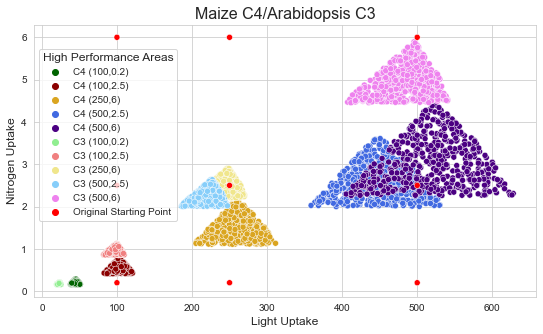

In [7]:
"""
Combining dataframes, defining color pallette and plotting
"""

df_hpa = pd.concat([c4_concat.assign(Models ='Maize C4'), c3_concat.assign(Models ='Arabidopsis C3'), df_points.assign(Models = "Starting Point")])


#C4 HPA were marked with darker colors while C3 HPA were marked with lighter colors
palette = {"C4 (100,0.2)":"darkgreen",
           "C3 (100,0.2)":"lightgreen",
           "C4 (100,2.5)":"darkred",
           "C3 (100,2.5)":"lightcoral",
           "C4 (250,6)":"goldenrod",
           "C3 (250,6)":"khaki",
           "C4 (500,2.5)":"royalblue",
           "C3 (500,2.5)":"lightskyblue",
           "C4 (500,6)":"indigo",
           "C3 (500,6)":"violet",
           "Original Starting Point": "red"} #The original starting points were marked in red

plt.figure(figsize=(9,5))
sns.set_style("whitegrid")
sns.scatterplot(x='Light', y='N', data=df_hpa, hue="conditions", palette=palette)
plt.title("Maize C4/Arabidopsis C3", size = 16)
plt.xlabel('Light Uptake', size = 12)
plt.ylabel('Nitrogen Uptake', size = 12)
plt.legend(title = "High Performance Areas", loc="upper left", bbox_to_anchor =(0, .93), fancybox = True, title_fontsize = "large")

#plt.xlim(10, 60)
#plt.ylim(0,0.4)

#plt.savefig('HPA_full_conditions_V2.svg', format='svg', bbox_inches = 'tight')
plt.show()


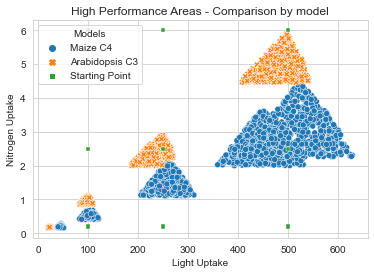

In [6]:
"""
Descrimination between C3 and C4 HPA
"""
sns.scatterplot(x='Light', y='N', data=df_hpa, hue="Models", style='Models')
plt.title("High Performance Areas - Comparison by model")
plt.xlabel('Light Uptake')
plt.ylabel('Nitrogen Uptake')
#plt.savefig('HPA_full_models.jpeg', format='jpeg', bbox_inches = 'tight')
plt.show()